# Monte-Carlo

La méthode de Monte-Carlo permet d'approximer des valeurs numériques en effectuant des tirages aléatoires.
On peut aussi parler de simulations de Monte-Carlo.

### Anecdote 

Son nom serait emprunté à la ville de Monaco, connue pour ses jeux d'argent aléatoires.

## Exemples

Imaginons que nous aimerions trouver la taille moyenne pour toutes les personnes sur Terre.

En pratique, on voudrait mesurer la taille de chaque personne vivant sur la planète actuellement (7.97 milliards au moment où j'écris ceci) et ensuite calculer la moyenne.

Cependant, on se rend rapidement compte que ce n'est pas faisable. On ne peut pas aller mesurer chaque personne individuellement.

<img style="width:30%; height:30%; display: block; margin-left: auto; margin-right: auto;" src="./src/rl_5_1.png">

La solution avec les simulations de Monte-Carlo est de mesurer la taille d'un groupe restreint de personnes en espérant que leur taille moyenne soit représentative de la population globale. Ainsi, il faut faire attention à deux choses:
* La sélection du groupe de personnes doit être non biaisée (i.e. sélectionner des personnes aléatoires à travers le globe).
* Le groupe de personnes mesurées ne doit pas être trop petit (plus on mesure d'individus, plus on est confiant sur l'approximation).

Pour rendre tout cela plus concret, nous allons proposer de voir, avec des schémas, l'approximation de la valeur de $\pi$.

Pour estimer la valeur de $\pi$ avec des simulations de Monte-Carlo, nous générons des points uniformément et aléatoirement sur $[0;1]$. Ensuite, nous allons utiliser le rôle de $\pi$ dans les cercles.

<img style="width:30%; height:30%; display: block; margin-left: auto; margin-right: auto;" src="./src/rl_5_2.png">

La valeur de $\pi$ peut ainsi être approximée telle que
 $$ \pi \approx 4 \cdot \frac{A_{m} }{A_{n} } $$

$A_{n}$ est l'aire du carré dans le premier cadrant et est donnée par
$$ A_{n} = 1 \cdot 1 = 1 $$

L'aire du quart de cercle, $A_{m}$ est donnée par
$$ A_{m} = \frac{1}{4} \cdot A(1) = \frac{1}{4} \pi $$

Ainsi, nous pouvons calculer  $\pi$ en utilisant le ratio de ces deux aires $A_{n}$ et $A_{m}$
$$ \frac{A_{m} }{A_{n} } = \frac{1}{4} \pi$$

$$ \pi = 4 \cdot \frac{A_{m} }{A_{n} } $$

et estimer $\pi$ par quatre fois le ratio de $A_{m}$ par $A_{n}$. Par exemple, si nous dessinons 150 points et 113 d'entre elles font partie du quart de cercle, $\pi$ sera estimé tel que:
$$ \pi \approx 4 \cdot \frac{113}{150} \approx 3,01 $$
La valeur approximée n'est pas très proche de $\pi$ puisque nous n'avons pas fait beaucoup de tirages.

Vous pouvez voir avec Python, un exemple avec des données aléatoires :

Estimate of pi: 2.96


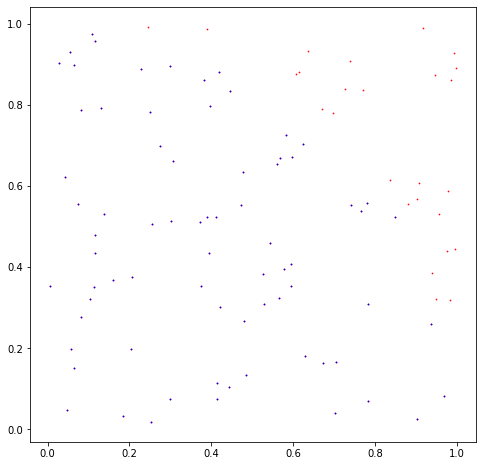

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

n = 100
x = np.random.rand(n, 2)
inside = x[np.sqrt(x[:, 0] ** 2 + x[:, 1] ** 2) < 1]
estimate = 4 * len(inside) / len(x)
print(f'Estimate of pi: {estimate}')

plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], s=.5, c='red')
plt.scatter(inside[:, 0], inside[:, 1], s=.5, c='blue')
plt.show()

Mais, comme nous l'avons dit précédemment, plus l'échantillon pris est important, plus nous pouvons être confiant sur l'estimation du résultat. Maintenant, nous pouvons vérifier ceci si nous générons une très large quantité de poids (e.g. 100 000), toujours de manière uniforme et aléatoire.

Estimate of pi: 3.14264


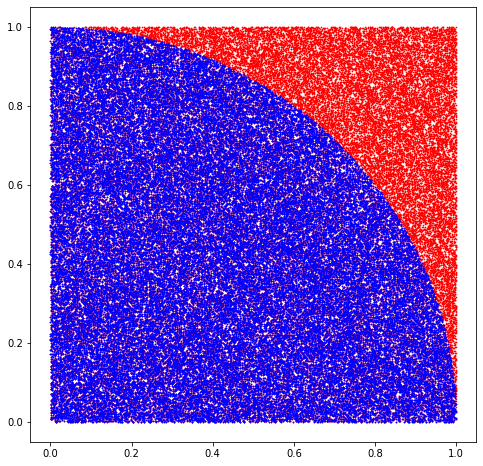

In [3]:
n = 100000
x = np.random.rand(n, 2)
inside = x[np.sqrt(x[:, 0] ** 2 + x[:, 1] ** 2) < 1]
estimate = 4 * len(inside) / len(x)
print(f'Estimate of pi: {estimate}')

plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], s=.5, c='red')
plt.scatter(inside[:, 0], inside[:, 1], s=.5, c='blue')
plt.show()

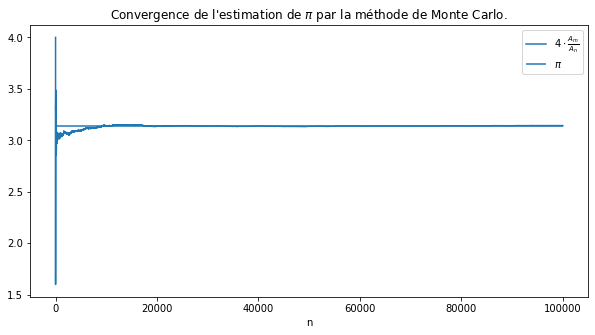

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
# Notez l'utilisation de np.cumsum(z) qui renvoie un array de la même taille 
# que z mais avec la somme cumulée le long de l'array.
conv = 4*np.cumsum(np.sqrt(x[:, 0] ** 2 + x[:, 1] ** 2) < 1)/(np.arange(n)+1)
plt.plot(conv, label=r'$4 \cdot \frac{A_{m} }{A_{n} }$')
plt.hlines(np.pi, 0, n, label=r'$\pi$')
ax.set(title=r"Convergence de l'estimation de $\pi$ par la méthode de Monte Carlo.",
      xlabel='n')
plt.legend();

La valeur de $\pi$ obtenue est maintenant bien plus proche de la vraie valeur que sur la simulation précédente.
On peut ainsi remarquer que l'estimation de $\pi$ converge assez rapidement vers une valeur stable qui est très proche de sa valeur correcte.

## Applications

Les simulations ou méthodes de Monte-Carlo sont particulièrement utilisées pour calculer des intégrales en dimensions supérieures à 1.

Elles sont également utilisées en physique des particules où ce genre de simulations probabilistes permettent d'estimer la forme d'un signal ou la sensibilité d'un détecteur.

Récemment, NukkAI, une entité développant des IA, à réussi à faire gagner son IA au jeu du Bridge contre 8 champions du monde. Alors, en Mars 2022, cette IA appelée Nook à réussi quelque chose d'inédit en combinant plusieurs techniques dont des méthodes de Monte-Carlo. Ainsi, Nook générait aléatoirement des mondes possibles contrainte par les règles du domaine et les modèles de l'adversaire.
Vous pouvez regarder une rediffusion de l'événement <a href="https://www.youtube.com/watch?v=DHpeHCsojbI">ici</a>.

## Conclusion

* Les simulations de Monte-Carlo sont des méthodes simples d'approximer une valeur numérique à partir de tirages aléatoires.
* Les applications sont variées et peuvent être définies très simplement.
* Ce genre de méthodes peuvent participer à réaliser des choses inédites ayant un impact conséquent sur la recherche.

## Sources

* <a href="https://knowmap.org/">Knowmap</a>
* <a href="https://www.cantorsparadise.com/estimating-%CF%80-using-monte-carlo-simulations-3459a84b5ef9">Utilisation des simulations de Monte-Carlo, Maike Elisa</a>
* <a href="https://www.normalesup.org/~doulcier/teaching/python/Ex01_monte_carlo.html">Exercice Monte-Carlo, normalesup.org</a>
* <a href="https://www.youtube.com/watch?v=7ESK5SaP-bc">Monte-Carlo Simulation, Marble Science, YouTube</a>
* <a href="https://www.flaticon.com/fr/icones-gratuites/monde" title="monde icônes">Monde icônes créées par turkkub - Flaticon</a>
* <a href="https://www.flaticon.com/free-icons/team" title="team icons">Team icons créées par Freepik - Flaticon</a>
* <a href="https://www.flaticon.com/free-icons/question-mark" title="question mark icons">Question mark icons créées par Freepik - Flaticon</a>
* <a href="https://www.univ-grenoble-alpes.fr/actualites/a-la-une/actualites-recherche/the-conversation-une-ia-championne-de-bridge--1095848.kjsp?RH=1573725981688">"Une IA championne de Bridge"</a>

Ecrit par <a href="https://github.com/MHaurel">MHaurel</a>